# Analysis
## Heatmaps, Matplotlib, and Scipy
### We analyzed the data using gmaps, matplotlib charts, and scipy statistical analyses.

In [16]:
import pandas as pd
import gmaps
from api_keys import g_key
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [17]:
#Pull complete store data from CSV, store into Dataframe
store_data = pd.read_csv("Output_CSVs/complete_data2.csv",encoding = "utf-8")

## Heatmaps
### We created heatmaps using the store locations to see the concentration of stores in the NE Ohio area

In [18]:
gmaps.configure(api_key=g_key)

# Store 'Lat' and 'Lng' into  locations for all stores
store_lats = store_data["Lat"].tolist()
store_lngs = store_data["Lng"].tolist()

locations = list(zip(store_lats,store_lngs))
len(locations)

269

In [19]:
#Print map of store locations and heatmaps
coords_layer = gmaps.symbol_layer(locations, 
        fill_color='blue', stroke_color='blue', scale=1)
heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False,point_radius = .05)
fig = gmaps.figure(center = (41.187472, -80.998031), zoom_level = 8)
fig.add_layer(coords_layer)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
#Make a dataframe of only the Walmart locations
walmart_df = store_data.loc[store_data["Store Name"] == "Walmart"]
#Make a dataframe of the wholesale clubs
wholesale_df = store_data.loc[(store_data['Store Name'] == "Costco Wholesale") | 
                              (store_data['Store Name']=="BJ's Wholesale") | (store_data['Store Name']=="Sam's Club")]
#Make a dataframe of Target stores
target_df = store_data.loc[store_data["Store Name"]=="Target"]

#Make a dataframe of the rest of the grocery stores
grocery_df = store_data.loc[(store_data["Store Name"] != "Walmart")] 
grocery_df = grocery_df.loc[(store_data['Store Name'] != "Costco Wholesale")]
grocery_df = grocery_df.loc[(store_data['Store Name']!="BJ's Wholesale")] 
grocery_df = grocery_df.loc[(store_data['Store Name']!="Sam's Club")]
grocery_df = grocery_df.loc[(store_data['Store Name'] != "Target")]

#Print lengths of each dataframe to make sure everything was filtered
print(len(walmart_df))
print(len(wholesale_df))
print(len(target_df))
print(len(grocery_df))

31
17
12
209


In [22]:
# Store 'Lat' and 'Lng' into  locations for Walmart
walmart_lats = walmart_df["Lat"].tolist()
walmart_lngs = walmart_df["Lng"].tolist()
walmart_loc = list(zip(walmart_lats,walmart_lngs))
#Store names into a list for info box
walmart_names = walmart_df["Store Name"].tolist()


walmart_coords = gmaps.symbol_layer(walmart_loc, 
        fill_color='blue', stroke_color='blue', scale=2,info_box_content=walmart_names)
walmart_heat = gmaps.heatmap_layer(walmart_loc, 
                                 dissipating=False,point_radius = .05)
fig = gmaps.figure(center = (41.187472, -80.998031), zoom_level = 8)
fig.add_layer(walmart_coords)
fig.add_layer(walmart_heat)
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
# Store 'Lat' and 'Lng' into  locations for Target
target_lats = target_df["Lat"].tolist()
target_lngs = target_df["Lng"].tolist()
target_loc = list(zip(target_lats,target_lngs))
#Store names into a list for info box
target_names = target_df["Store Name"].tolist()

target_coords = gmaps.symbol_layer(target_loc, 
        fill_color='red', stroke_color='red', scale=2,info_box_content = target_names)
target_heat = gmaps.heatmap_layer(target_loc, 
                                 dissipating=False,point_radius = .05)
fig = gmaps.figure(center = (41.187472, -80.998031), zoom_level = 8)
fig.add_layer(target_coords)
fig.add_layer(target_heat)
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
# Store 'Lat' and 'Lng' into  locations for Wholesale Clubs
whole_lats = wholesale_df["Lat"].tolist()
whole_lngs = wholesale_df["Lng"].tolist()

#Store names into a list for the info box
whole_names = wholesale_df["Store Name"].tolist()
whole_loc = list(zip(whole_lats,whole_lngs))

whole_coords = gmaps.symbol_layer(whole_loc, 
        fill_color='yellow', stroke_color='yellow', scale=2,info_box_content=whole_names)
whole_heat = gmaps.heatmap_layer(whole_loc, 
                                 dissipating=False,point_radius = .05)
fig = gmaps.figure(center = (41.187472, -80.998031), zoom_level = 8)
fig.add_layer(whole_coords)
fig.add_layer(whole_heat)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# Store 'Lat' and 'Lng' into  locations for Grocery Stores
grocery_lats = grocery_df["Lat"].tolist()
grocery_lngs = grocery_df["Lng"].tolist()
grocery_loc = list(zip(grocery_lats,grocery_lngs))

#Store names into a list for info box
grocery_names = grocery_df["Store Name"].tolist()

grocery_coords = gmaps.symbol_layer(grocery_loc, 
        fill_color="teal", stroke_color="teal", scale=2,info_box_content=grocery_names)
grocery_heat = gmaps.heatmap_layer(grocery_loc, 
                                 dissipating=False,point_radius = .05)

fig = gmaps.figure(center = (41.187472, -80.998031), zoom_level = 8)
fig.add_layer(grocery_coords)
fig.add_layer(grocery_heat)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#Display all of the colored maps together
fig = gmaps.figure(center = (41.187472, -80.998031), zoom_level = 8)
fig.add_layer(grocery_coords)
fig.add_layer(target_coords)
fig.add_layer(walmart_coords)
fig.add_layer(whole_coords)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#GPS Coordinates of the Counties from https://latitude.to/
#Ashtabula County = (41.93970 -80.72144)
#Columbiana County = (40.79026 -80.76578)
#Cuyahoga County = (41.43392 -81.67582)
#Geauga County = (41.46415 -81.20782)
#Lake County = (41.98153 -81.25188)
#Lorain County = (41.41169 -82.12784)
#Mahoning County = (40.98718 -80.72144)
#Medina County = (41.08013 -81.95348)
#Portage County = (41.18876 -81.25188)
#Stark County = (40.86847 -81.25188)
#Summit County = (41.09190 -81.55964)
#Trumbull County = (41.30650 -80.72144)
#(Coordinates for Ashtabula and Lake Counties were moved down so the coordinates appear on land on gmaps)

#Store the coordinates into a list
alpha_county_coords = [(41.72970, -80.72144),(40.79026, -80.76578),(41.43392, -81.67582),(41.46415, -81.20782),
                     (41.75153, -81.25188),(41.41169, -82.12784),(40.98718, -80.72144),(41.08013, -81.95348),
                     (41.18876, -81.25188),(40.86847, -81.25188),(41.09190, -81.55964),(41.30650, -80.72144)]

#Get the data for Poverty Rate and County
county_pop = store_data[["County","Population","Poverty Rate"]]
#Drop duplicates so the county data only appears once
county_pop = county_pop.drop_duplicates("County")
#Sort values alphabetically and reset indeces
county_pop = county_pop.sort_values("County").reset_index()
county_pop

,index,County,Population,Poverty Rate
0,155,Ashtabula County,"98,136",19.58%
1,261,Columbiana County,"104,003",14.08%
2,51,Cuyahoga County,"1,253,783",17.70%
3,206,Geauga County,"93,961",6.00%
4,162,Lake County,"230,052",8.19%
5,131,Lorain County,"306,713",13.30%
6,135,Mahoning County,"231,064",17.07%
7,221,Medina County,"177,257",6.38%
8,233,Portage County,"162,644",12.51%
9,188,Stark County,"373,475",13.50%


In [28]:
#Make a list of poverty rates by dropping the percentage in the string
county_poverty = county_pop['Poverty Rate'].str.replace('%','')

#Make info box for each location on the map
info_box = []
for index, row in county_pop.iterrows():
    info_box.append(f"{row['County']}-Poverty Rate: {row['Poverty Rate']}")
info_box

['Ashtabula County-Poverty Rate: 19.58%',
 'Columbiana County-Poverty Rate: 14.08%',
 'Cuyahoga County-Poverty Rate: 17.70%',
 'Geauga County-Poverty Rate: 6.00%',
 'Lake County-Poverty Rate: 8.19%',
 'Lorain County-Poverty Rate: 13.30%',
 'Mahoning County-Poverty Rate: 17.07%',
 'Medina County-Poverty Rate: 6.38%',
 'Portage County-Poverty Rate: 12.51%',
 'Stark County-Poverty Rate: 13.50%',
 'Summit County-Poverty Rate: 12.84%',
 'Trumbull County-Poverty Rate: 17.15%']

In [29]:
#Make a heatmap of the county's rough coordinates, using the poverty rate as the weight of the heatmap
pov_heatmap = gmaps.heatmap_layer(alpha_county_coords, weights = county_poverty, 
                                 dissipating=False,point_radius = .15)

#Make a symbol layer of the coordinates to display information if you click on them
pov_coords = gmaps.symbol_layer(alpha_county_coords, 
        fill_color="black", stroke_color="black", scale=2,info_box_content=info_box)

fig = gmaps.figure(center = (41.187472, -80.998031), zoom_level = 8)
fig.add_layer(pov_heatmap)
fig.add_layer(pov_coords)
#Show the store locations on the map
fig.add_layer(grocery_coords)
fig.add_layer(target_coords)
fig.add_layer(walmart_coords)
fig.add_layer(whole_coords)
fig

Figure(layout=FigureLayout(height='420px'))

## Matplotlib Charts
### 

In [30]:
complete_df = pd.read_csv("Output_CSVs/complete_data2.csv",encoding = "utf-8")
count = complete_df['Store Name'].value_counts()
# Set up data for store count chart
store_counts = pd.Series(count)
x_labels = count.index.to_list()
store_counts

Save A Lot          47
Giant Eagle         46
ALDI                41
Marc's Stores       35
Walmart             31
Heinen's            21
Dave's Markets      13
Target              12
Sam's Club           7
BJ's Wholesale       6
Whole Foods          5
Costco Wholesale     4
Berry's              1
Name: Store Name, dtype: int64

## Distribution of Stores in NE Ohio by Store Name

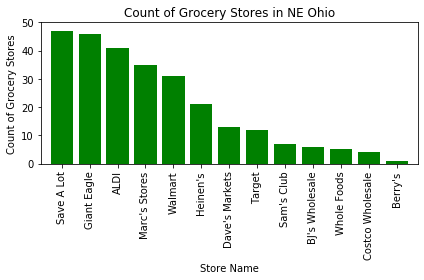

In [31]:
# Create bar chart of grocery stores and warehouse clubs
x_axis = np.arange(len(store_counts))
plt.bar(x_axis,store_counts,color='g',align='center')

# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,50)

# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_labels,rotation=90) 

# Enter title and labels
plt.title("Count of Grocery Stores in NE Ohio")
plt.xlabel("Store Name")
plt.ylabel("Count of Grocery Stores")

plt.tight_layout()
plt.savefig("store_count_bar_chart.png")
plt.show()

## Population vs Grocery Store Count

In [39]:
# Create scatter plot of population vs grocery count by county
# Determine store counts by county
store_count_by_cty = complete_df.groupby(['County']).count()
store_count_list = store_count_by_cty['Lat']
store_count_list

County
Ashtabula County      7
Columbiana County     8
Cuyahoga County      80
Geauga County        15
Lake County          26
Lorain County         4
Mahoning County      20
Medina County        12
Portage County       15
Stark County         18
Summit County        51
Trumbull County      13
Name: Lat, dtype: int64

In [40]:
# Hold list of counties needed for later figure
counties = store_count_by_cty.index.to_list()

#Get list of populations by county
pop_list = complete_df['Population'].unique()
cty_list = complete_df['County'].unique()
pop_list_df = pd.DataFrame({
    "Population":pop_list,
    "County": cty_list })
pop_list_sorted = pop_list_df.sort_values(by='County')
pop_list_sorted

,Population,County
4,"98,136",Ashtabula County
11,"104,003",Columbiana County
1,"1,253,783",Cuyahoga County
7,"93,961",Geauga County
5,"230,052",Lake County
2,"306,713",Lorain County
3,"231,064",Mahoning County
8,"177,257",Medina County
9,"162,644",Portage County
6,"373,475",Stark County


In [48]:
pop_list_sorted['Population'] = pop_list_sorted['Population'].str.replace(',', '') #.astype(float)
pop_list_num = pd.to_numeric(pop_list_sorted["Population"])
pop_list_num

4       98136
11     104003
1     1253783
7       93961
5      230052
2      306713
3      231064
8      177257
9      162644
6      373475
0      541810
10     201794
Name: Population, dtype: int64

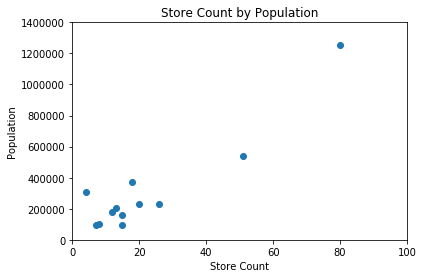

In [50]:
# Set up scatter plot
plt.xlim(0,100)
plt.ylim(0,1400000)
plt.scatter(store_count_list,pop_list_num,marker='o')
        
# Set up title and labels
plt.title("Store Count by Population")
plt.xlabel("Store Count")
plt.ylabel("Population")

# Save figure 
plt.savefig("store_count_vs_population.png")
plt.show()

## Linear Regression of Population vs Grocery Stores

In [51]:
# Calculate the correlation coefficient between population and store count
store_count_list_reindex = store_count_list.reset_index(drop=True)
correlation_df = pd.DataFrame({"Store Count": store_count_list_reindex, "Population": pop_list_num})

#pearsoncorr = correlation_df.corr(method='pearson')
#print(pearsoncorr)

corr = st.pearsonr(store_count_list_reindex,pop_list_num)
print(f"The Pearson's Correlation Coefficient between county population and store count is {round(corr[0],2)}")

The Pearson's Correlation Coefficient between county population and store count is 0.93


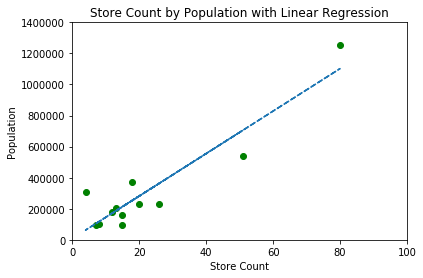

In [53]:
# Perform a linear regression
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(store_count_list_reindex, pop_list_num)

# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * store_count_list_reindex + vc_int

# Plot the linear model on top of scatter plot 
plt.scatter(store_count_list_reindex, pop_list_num, color='g')
plt.plot(store_count_list_reindex,vc_fit,"--")
plt.title("Store Count by Population with Linear Regression")
plt.xlabel("Store Count")
plt.ylabel("Population")
plt.xlim(0,100)
plt.ylim(0,1400000)

# Save plot
plt.savefig("store_count_vs_pop_linearreg.png")
plt.show()

## Grocery Stores by County

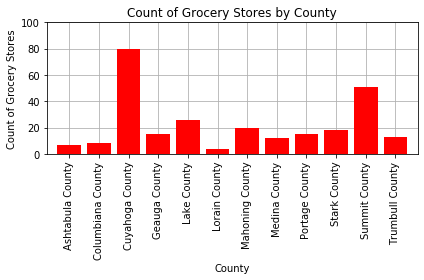

In [54]:
# Set up bar chart for store count by county
x_labels2 = store_count_list.index.to_list()
x_axis = np.arange(len(counties))
plt.bar(x_axis,store_count_list,color='r',align='center',zorder=3)

# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,100)

# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_labels2,rotation=90) 

# Enter title and labels
plt.title("Count of Grocery Stores by County")
plt.xlabel("County")
plt.ylabel("Count of Grocery Stores")

plt.tight_layout()
plt.savefig("store_count_by_county.png")
plt.grid(zorder=0)
plt.show()

## Poverty Rate vs Grocery Store Count

In [55]:
# Create scatter plot of poverty rate vs grocery count by county
# Get list of poverty rates by county
pov_rate_list = complete_df['Poverty Rate'].unique()
pov_rate_df = pd.DataFrame({
    "Poverty Rate": pov_rate_list,
    "County": cty_list })
pov_rate_sorted = pov_rate_df.sort_values(by='County')
pov_rate_sorted

,Poverty Rate,County
4,19.58%,Ashtabula County
11,14.08%,Columbiana County
1,17.70%,Cuyahoga County
7,6.00%,Geauga County
5,8.19%,Lake County
2,13.30%,Lorain County
3,17.07%,Mahoning County
8,6.38%,Medina County
9,12.51%,Portage County
6,13.50%,Stark County


In [57]:
# Remove percentages and convert population column to numeric values
pov_rate_sorted['Poverty Rate'] = pov_rate_sorted['Poverty Rate'].str.replace('%', '')
pov_rate_num = pd.to_numeric(pov_rate_sorted["Poverty Rate"])
pov_rate_num

4     19.58
11    14.08
1     17.70
7      6.00
5      8.19
2     13.30
3     17.07
8      6.38
9     12.51
6     13.50
0     12.84
10    17.15
Name: Poverty Rate, dtype: float64

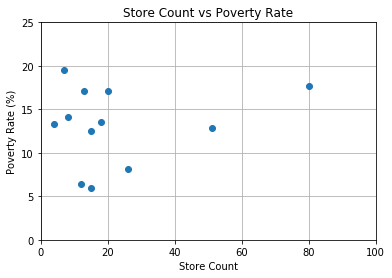

In [58]:
# Set up scatter plot
plt.xlim(0,100)
plt.ylim(0,25)
plt.scatter(store_count_list,pov_rate_num,marker='o',zorder=3)
        
# Set up title and labels
plt.title("Store Count vs Poverty Rate")
plt.xlabel("Store Count")
plt.ylabel("Poverty Rate (%)")

# Save figure 
plt.savefig("store_count_vs_povertyrate.png")
plt.grid(zorder=0)
plt.show()

In [59]:
correlation = st.pearsonr(store_count_list_reindex,pov_rate_num)
print(f"The Pearson's Correlation Coefficient between county poverty rate and store count is {round(correlation[0],2)}")

The Pearson's Correlation Coefficient between county poverty rate and store count is 0.19


## Income vs Grocery Store Count

In [60]:
# Create scatter plot of income vs grocery count by county
# Get list of incomes by county
income_list = complete_df['Household Income'].unique()
income_df = pd.DataFrame({
    "Income": income_list,
    "County": cty_list })
income_sorted = income_df.sort_values(by='County')
income_sorted

,Income,County
4,"$ 44,823",Ashtabula County
11,"$ 46,306",Columbiana County
1,"$ 48,435",Cuyahoga County
7,"$ 79,956",Geauga County
5,"$ 63,475",Lake County
2,"$ 56,965",Lorain County
3,"$ 44,682",Mahoning County
8,"$ 74,243",Medina County
9,"$ 56,618",Portage County
6,"$ 52,190",Stark County


In [61]:
# Remove dollar signs and commas and convert to numeric
income_sorted['Income'] = income_sorted['Income'].str.replace('$', '')
income_sorted['Income'] = income_sorted['Income'].str.replace(',', '')
income_num = pd.to_numeric(income_sorted["Income"])
income_num

4     44823
11    46306
1     48435
7     79956
5     63475
2     56965
3     44682
8     74243
9     56618
6     52190
0     55448
10    45975
Name: Income, dtype: int64

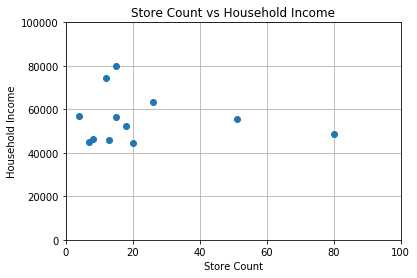

In [62]:
# Set up scatter plot
plt.xlim(0,100)
plt.ylim(0,100000)
plt.scatter(store_count_list,income_num,marker='o',zorder=3)
        
# Set up title and labels
plt.title("Store Count vs Household Income")
plt.xlabel("Store Count")
plt.ylabel("Household Income")

# Save figure 
plt.savefig("store_count_vs_income.png")
plt.grid(zorder=0)
plt.show()

In [63]:
correlation2 = st.pearsonr(store_count_list_reindex,income_num)
print(f"The Pearson's Correlation Coefficient between county household income and store count is {round(correlation2[0],2)}")

The Pearson's Correlation Coefficient between county household income and store count is -0.13


## Population Distribution by County

In [4]:
data = pd.read_csv("Output_CSVs/complete_data2.csv", index_col ="Store Name")
data.head()

,Lat,Lng,Address,Place ID,County,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate
Store Name,,,,,,,,,,
Costco Wholesale,41.265324,-81.507401,"6720 Bass Pro Dr, Hudson",ChIJrwEsWXIgMYgRnko93meT4s0,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
BJ's Wholesale,41.115934,-81.482591,"1677 Home Ave, Akron",ChIJr1lVVGUoMYgRZyNHvaFakyk,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
Target,41.120956,-81.477382,"449 Howe Avenue, Cuyahoga Falls",ChIJ4yprBHwoMYgRH8i8pVsr_wg,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
Target,41.128045,-81.605230,"2801 West Market Street, Fairlawn",ChIJGTnBXK3QMIgRDgULwwfSHv8,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
Target,40.983936,-81.495815,"762 Arlington Ridge, Akron",ChIJs7bpDL8qMYgRm6Akf2ZDq08,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%


In [5]:
data = data.drop_duplicates(subset = "County").reset_index(drop=True)
data.head(2)

,Lat,Lng,Address,Place ID,County,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,41.265324,-81.507401,"6720 Bass Pro Dr, Hudson",ChIJrwEsWXIgMYgRnko93meT4s0,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
1,41.316908,-81.815903,"16690 Royalton Rd, Strongsville",ChIJNa2MJXnqMIgRmZ164eouXjE,Cuyahoga County,"1,253,783","$ 48,435","$ 31,804","221,899",17.70%


In [6]:
pf = pd.DataFrame(data)
pf.head(2)

,Lat,Lng,Address,Place ID,County,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,41.265324,-81.507401,"6720 Bass Pro Dr, Hudson",ChIJrwEsWXIgMYgRnko93meT4s0,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
1,41.316908,-81.815903,"16690 Royalton Rd, Strongsville",ChIJNa2MJXnqMIgRmZ164eouXjE,Cuyahoga County,"1,253,783","$ 48,435","$ 31,804","221,899",17.70%


In [8]:
pf = data.iloc[:,lambda data: [4,5,6,]]
pf.head(15)

,County,Population,Household Income
0,Summit County,"541,810","$ 55,448"
1,Cuyahoga County,"1,253,783","$ 48,435"
2,Lorain County,"306,713","$ 56,965"
3,Mahoning County,"231,064","$ 44,682"
4,Ashtabula County,"98,136","$ 44,823"
5,Lake County,"230,052","$ 63,475"
6,Stark County,"373,475","$ 52,190"
7,Geauga County,"93,961","$ 79,956"
8,Medina County,"177,257","$ 74,243"
9,Portage County,"162,644","$ 56,618"


In [9]:
county = ['Summit','Cuyahoga','Lorain','Mahoning','Ashtabula','Lake','Stark','Geauga','Medina',
          'Portage','Trumbull','Columbiana']
Population = [541810,1253783,306713,231064,98136,230052,373475,93961,177257,162644,201794,104003]
income = [55448,48435,56965,44682,44823,63475,52190,79956,74243,56618,45975,46306]  

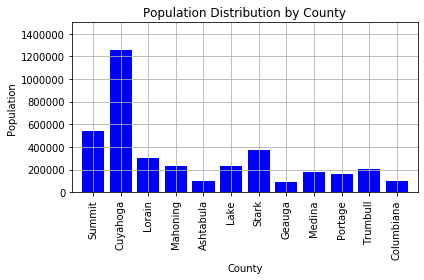

In [10]:
x_axis = np.arange(len(Population))
plt.bar(x_axis, Population, color="b", align="center")
# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,1500000)
# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,county,rotation=90)

# Enter title and labels
plt.title("Population Distribution by County")
plt.xlabel("County")
plt.ylabel("Population")

plt.tight_layout()
plt.savefig("Population_Distribution.png")
plt.grid(zorder=0)
plt.show()

## Household Income Distribution by County

In [14]:
pf['Household Income'] = pf['Household Income'].str.replace('$', '') 
pf['Household Income'] = pf['Household Income'].str.replace(',', '') 
pop_income = pd.to_numeric(pf["Household Income"])
pop_income

C:\Users\Ben\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ben\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     55448
1     48435
2     56965
3     44682
4     44823
5     63475
6     52190
7     79956
8     74243
9     56618
10    45975
11    46306
Name: Household Income, dtype: int64

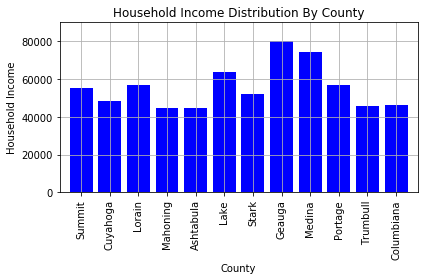

In [15]:
x_axis = np.arange(len(income))
plt.bar(x_axis, income, color="b", align="center")
# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,90000)
# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,county,rotation=90)

# Enter title and labels
plt.title("Household Income Distribution By County")
plt.xlabel("County")
plt.ylabel("Household Income")

plt.tight_layout()
plt.savefig("Household_Income_By_County.png")
plt.grid(zorder=0)
plt.show()